# Assignment 2

In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




#### Brief Description of the Data
This dataset is for a marketing company to analyze the impact of advertising campaigns. It captures the details of individuals exposed to either a specific advertisement or a public service announcement. The dataset provides insights into whether the campaign led to a conversion, the number of ads seen by the individual, and details about the most active day and hour.

#### Link to Read in the Data
The dataset is from kaggle: [Marketing A/B Testing Dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/). 
The data has been placed in a GitHub repository, with this link to read in the data: [https://raw.githubusercontent.com/ZiyueChloeZhang/A-B-Testing/main/data/marketing_AB.csv](https://raw.githubusercontent.com/ZiyueChloeZhang/A-B-Testing/main/data/marketing_AB.csv)

#### Question of Interest
> Do the company's advertisements generate a meaningful increase in purchase conversion rates when compared to those not exposed to the advertisements?

## Read, Clean and Wrangle Data

In [2]:
# data placed in a GitHub repository
url = "https://raw.githubusercontent.com/ZiyueChloeZhang/A-B-Testing/main/data/marketing_AB.csv"

# read data
marketing <- read.csv(url)

In [3]:
str(marketing)

'data.frame':	588101 obs. of  7 variables:
 $ X            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ user.id      : int  1069124 1119715 1144181 1435133 1015700 1137664 1116205 1496843 1448851 1446284 ...
 $ test.group   : chr  "ad" "ad" "ad" "ad" ...
 $ converted    : chr  "False" "False" "False" "False" ...
 $ total.ads    : int  130 93 21 355 276 734 264 17 21 142 ...
 $ most.ads.day : chr  "Monday" "Tuesday" "Tuesday" "Tuesday" ...
 $ most.ads.hour: int  20 22 18 10 14 10 13 18 19 14 ...


According to the structure above, the dataframe `marketing` has 588101 rows and 7 variables.

In [4]:
# check for missing values
sum(is.na(marketing))

[1] 0

There is no missing value in the data frame.

In [5]:
# Remove duplicated rows if exist:
marketing <- marketing %>% distinct()

Find the range for numeric variables, and unique values for non-numeric variables:

In [6]:
# find min and max for numeric value, to identify errors in numeric variables
summary(marketing)

       X             user.id         test.group         converted        
 Min.   :     0   Min.   : 900000   Length:588101      Length:588101     
 1st Qu.:147025   1st Qu.:1143190   Class :character   Class :character  
 Median :294050   Median :1313725   Mode  :character   Mode  :character  
 Mean   :294050   Mean   :1310692                                        
 3rd Qu.:441075   3rd Qu.:1484088                                        
 Max.   :588100   Max.   :1654483                                        
   total.ads       most.ads.day       most.ads.hour  
 Min.   :   1.00   Length:588101      Min.   : 0.00  
 1st Qu.:   4.00   Class :character   1st Qu.:11.00  
 Median :  13.00   Mode  :character   Median :14.00  
 Mean   :  24.82                      Mean   :14.47  
 3rd Qu.:  27.00                      3rd Qu.:18.00  
 Max.   :2065.00                      Max.   :23.00  

From the summary above, the range for each numeric variables are as followed:
| Variable Name  | Description and Expected Range                                                                                   |Range|
|----------------|-----------------------------------------------------------------------------------------------|----|
| X              |Row index                                                                                     | [0, 588100]|
| user.id        |Unique identifier for each user.                                                              | [900000, 1654483]|
| total ads      |Total number of ads seen by the user.                                                         |[1, 2065]|
| most.ads.hour |The hour of the day when the user viewed the most ads, should be an integer from 0 to 23 inclusive.                                        | [0, 23]|

No errors in the numeric variables. 

However, the variables "X" and "user.id" represent the row index and a unique identifier for each user, respectively, which do not contribute to the analysis of how different groups respond to advertising since they do not reflect behavioral or characteristic data that would influence conversion rates, therefore we remove these two columns.

In [7]:
# remove irrelavent columns
marketing <- marketing %>% select(-X, -user.id)

In [8]:
# find unique values in non-numeric variables
unique(marketing$test.group)
unique(marketing$converted)
unique(marketing$most.ads.day)

[1] "ad"  "psa"

[1] "False" "True"

[1] "Monday"    "Tuesday"   "Friday"    "Saturday"  "Wednesday" "Sunday"   
[7] "Thursday"

| Variable Name  |  Description                                                                                   | Unique |
|----------------|-----------------------------------------------------------------------------------------------|----|
| test.group     | The group the user belongs to. | 'ad'(the person saw the advertisement), 'psa'(they only saw the public service announcement)|
| converted      | Indicates conversion. | "True" (if a person bought the product), "False"|
| most.ads.day   | The day on which the user viewed the most number of ads.|"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"|                                      |   

No unexpected values in the non-numeric variables. However, the `converted` only have "True", "False" values. Check if its type is logical for representing boolean value.

In [9]:
typeof(marketing$converted)

[1] "character"

The type is 'character' instead of 'logical', so we convert `converted` into a logical variable.

In [10]:
marketing$converted <- as.logical(marketing$converted)

Now the dataframe `marketing` is tidy. View the first 5 rows:

In [11]:
head(marketing)

,test.group,converted,total.ads,most.ads.day,most.ads.hour
,<chr>,<lgl>,<int>,<chr>,<int>
1,ad,FALSE,130,Monday,20
2,ad,FALSE,93,Tuesday,22
3,ad,FALSE,21,Tuesday,18
4,ad,FALSE,355,Tuesday,10
5,ad,FALSE,276,Friday,14
6,ad,FALSE,734,Saturday,10


## Exploratory Data Analysis and Visualization

In [12]:
# shared theme
theme = theme_minimal() + theme(
    text = element_text(size = 50),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
)

In [13]:
# Calculate conversion rates for each group
conversion_rate_group <- marketing %>%
  group_by(test.group) %>%
  summarise(conversion_rate = mean(as.numeric(converted)), .groups = 'drop')
conversion_rate_group

# Plot conversion rates for each group
conversion_rate_bar = ggplot(conversion_rate_group, aes(x = test.group, y = conversion_rate, fill = test.group)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = scales::percent) +
  ggtitle("Conversion Rate of Each Group") + 
  labs(x = "Test Group", y = "Conversion Rate", fill = "Test Group") +
  theme

test.group,conversion_rate
<chr>,<dbl>
ad,0.02554656
psa,0.01785411


In [14]:
days_of_week = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

# Calculate conversion rates for day of a week for each group
conversion_rates_day <- marketing %>%
  group_by(test.group, most.ads.day) %>%
  summarise(conversion_rate = mean(as.numeric(converted)), .groups = 'drop') %>%
  mutate(most.ads.day = factor(most.ads.day, levels = days_of_week))
conversion_rates_day

# Creacted faceted bar graph of conversion rates by day of the week for each group
conversion_rate_day_bar = ggplot(conversion_rates_day, aes(x = most.ads.day, y = conversion_rate, fill = test.group)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ test.group) +
  scale_y_continuous(labels = scales::percent) +
  ggtitle("Conversion Rate of Each Group on Each Day of the Week") + 
  labs(x = "Day of the Week", y = "Conversion Rate", fill = "Test Group") +
  theme +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

test.group,most.ads.day,conversion_rate
<chr>,<fct>,<dbl>
ad,Friday,0.02246495
ad,Monday,0.03324120
ad,Saturday,0.02130657
ad,Sunday,0.02461983
ad,Thursday,0.02163714
ad,Tuesday,0.03044038
ad,Wednesday,0.02535586
psa,Friday,0.01630292
psa,Monday,0.02255854


In [15]:
# Calculate conversion rates for each hour in each day of a week for each group
conversion_rate_hour <- marketing %>%
  group_by(most.ads.day, most.ads.hour, test.group) %>%
  summarise(conversion_rate = mean(as.numeric(converted)), .groups = 'drop') %>%
  mutate(
     most.ads.day = factor(most.ads.day, levels = days_of_week),
     most.ads.hour = factor(most.ads.hour, levels = as.character(0:23))
  )
head(conversion_rate_hour)

# Create the heatmap
conversion_rate_hour_heatmap = ggplot(conversion_rate_hour, aes(x = most.ads.day, y = most.ads.hour, fill = conversion_rate)) +
  geom_tile() + 
  ggtitle("Conversion Rate of Each Group in Each Hour on Each Day of the Week")+
  labs(x = "Day of the Week", y = "Hour of Day (HH:MM)", fill = "Conversion Rate") +
  facet_wrap(~ test.group) +
  scale_fill_gradient2(labels = scales::percent) +
  scale_x_discrete() +
  scale_y_discrete(labels = function(x) paste0(str_pad(x, width = 2, pad = "0"), ":00")) +
  theme +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

most.ads.day,most.ads.hour,test.group,conversion_rate
<fct>,<fct>,<chr>,<dbl>
Friday,0,ad,0.01982652
Friday,0,psa,0.00000000
Friday,1,ad,0.01057402
Friday,1,psa,0.00000000
Friday,2,ad,0.01212121
Friday,2,psa,0.00000000


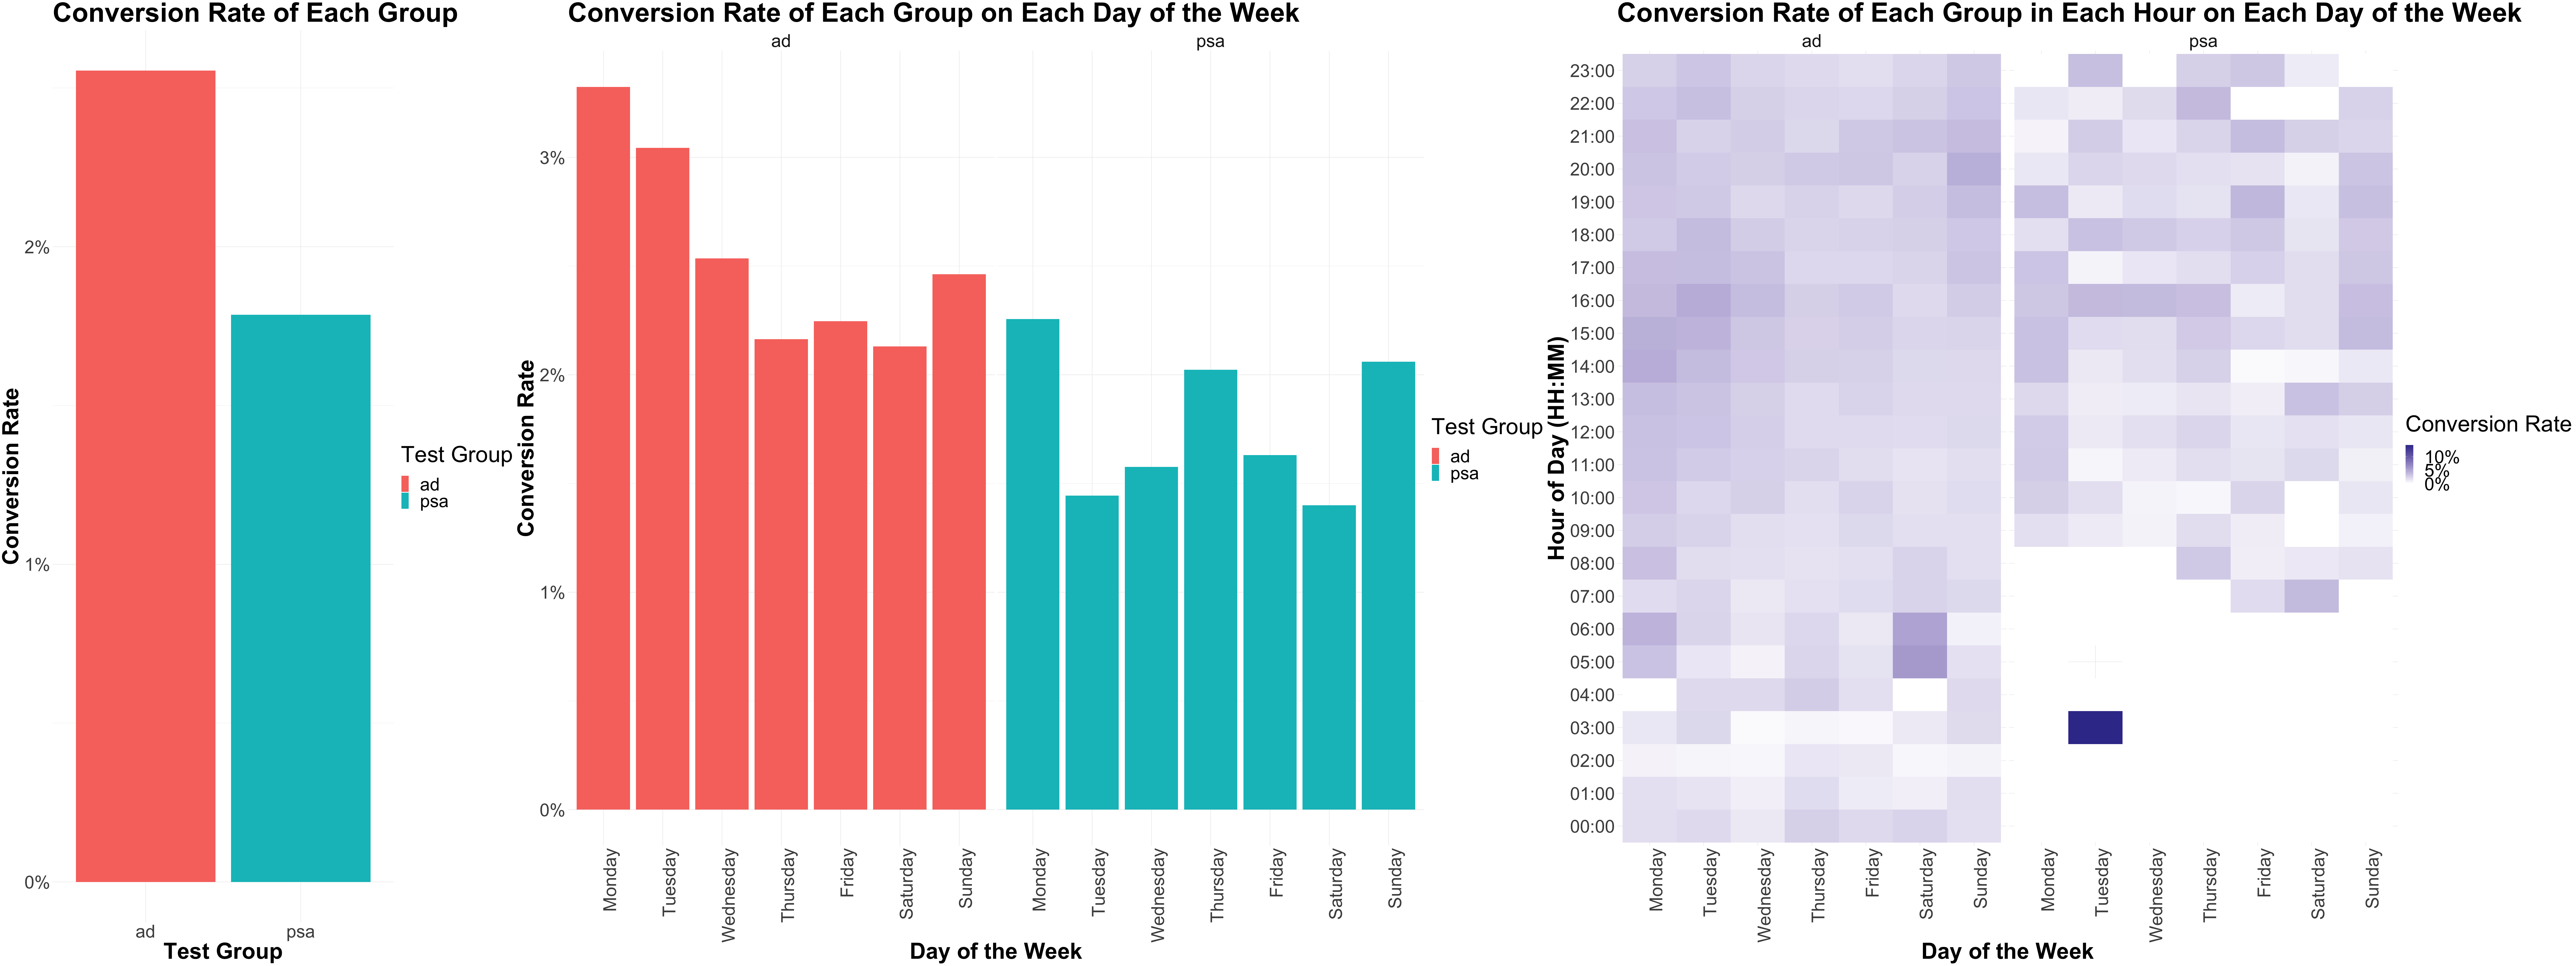

In [16]:
# put three visualization together
options(repr.plot.width=80, repr.plot.height=30)

grid.arrange(
    conversion_rate_bar, 
    conversion_rate_day_bar, 
    conversion_rate_hour_heatmap, 
    nrow = 1,
    widths = c(0.5, 1, 1)
)

These three plots provide a visualized exploration of data to answer the question of whether the company's advertisements are effective at increasing purchase conversion rates.

1. **Conversion Rate of Each Group (Bar Chart)**: This plot directly addresses the core question by comparing the average conversion rates between the groups exposed to advertisements ('ad') and the public service announcements ('psa'). A clear visual comparison can be made through the heights of the bars. The 'ad' group's bar is significantly higher, suggesting that advertisements may indeed be effective at increasing conversions.

2. **Conversion Rate of Each Day of the Week (Faceted Bar Chart)**: By breaking down conversion rates by day of the week and faceting by group, this chart allows for a more granular analysis. It helps to determine if there are specific days when advertisements are more effective, which can be crucial for understanding and optimizing ad scheduling. A faceted bar chart makes it easy to compare patterns across groups for each day, potentially revealing insights into consumer behavior and the impact of ads on different days.

3. **Conversion Rate of Each Hour on Each Day of the Week (Faceted Heatmap)**: The heatmap provides a visualization of conversion rate patterns across days and hours, offering a more granular view of temporal trends. This can indicate peak times when advertisements lead to more conversions. By faceting the heatmap by group, one can compare these temporal patterns between those who saw the ads and those who did not, identifying if and when advertisements are more likely to influence purchasing decisions.